In [1]:
#General
import re
import sys
import pprint
import seaborn as sb
import numpy   as np
import pandas  as pd
import random  as rnd

from os.path import isfile
from copy    import deepcopy
from time    import time
from tqdm    import tqdm
from getdist import plots
from bios    import read

from scipy.interpolate import interp1d
from scipy.stats       import multivariate_normal
from itertools         import repeat

from getdist import plots,loadMCSamples,MCSamples

from theory_code.distance_theory import TheoryCalcs

#Plotting
import matplotlib
import matplotlib.pyplot as plt


from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 18})

red    = '#8e001c'
yellow = '#ffb302'

sidelegend = {'bbox_to_anchor': (1.04,0.5), 
              'loc': "center left",
              'frameon': False}
bottomlegend = {'bbox_to_anchor': (0.35,-0.2), 
                'loc': "center left",
                'frameon': False,
                'ncols': 3}

In [2]:
from analysis.chains_analysis import Analyzer

# Pantheon plots

## SH0ES calibration methods

In [3]:
fiducial = {'omegam': 0.309,
            'H0': 73.5,
            'MB': -19.2435}

stats = Analyzer(fiducial)

chains = {r'Pantheon+Gaussian': {'path': 'chains/standard/LCDM_Pantheon_gaussprior',
                                 'sampler': 'Nautilus',
                                 'color': yellow,
                                 'filled': True},
          r'Pantheon+SH0ES': {'path': 'chains/standard/LCDM_Pantheon_SH0ES',
                               'sampler': 'Nautilus',
                               'color': red,
                               'filled': True},
          r'Pantheon without calibration': {'path': 'chains/standard/LCDM_Pantheon_noprior',
                                            'sampler': 'Nautilus',
                                            'color': 'black',
                                            'filled': False},
          }

In [4]:
analyzed_chains = {}
for name,sets in chains.items():
    try:
        analyzed_chains[name] = stats.analyze_chain(name,sets)
    except:
        print('')
        print('{} not available'.format(name))
        print('')


 Analyzing Pantheon+Gaussian 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.336\pm 0.018            $\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02219\pm 0.00058        $\\

{\boldmath$H_0            $} & $73.3\pm 1.2               $\\

{\boldmath$M_B            $} & $-19.246\pm 0.035          $\\

{\boldmath$\Omega_\mathrm{c} h^2$} & $0.158\pm 0.011            $\\

{\boldmath$r_\mathrm{d}   $} & $138.6\pm 2.3              $\\

{\boldmath$\Omega_\Lambda $} & $0.664\pm 0.018            $\\
\hline
\end{tabular}
no .minimum file available for Pantheon+Gaussian. Switching to best sample
Best sample unavailable for some reason. Using means as best fit (DO NOT TRUST THIS!)
Best fit chi2 not available

 Analyzing Pantheon+SH0ES 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.336\pm 0.018            $\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02217\pm 0.00054        $\\

{\boldmath$H_0         

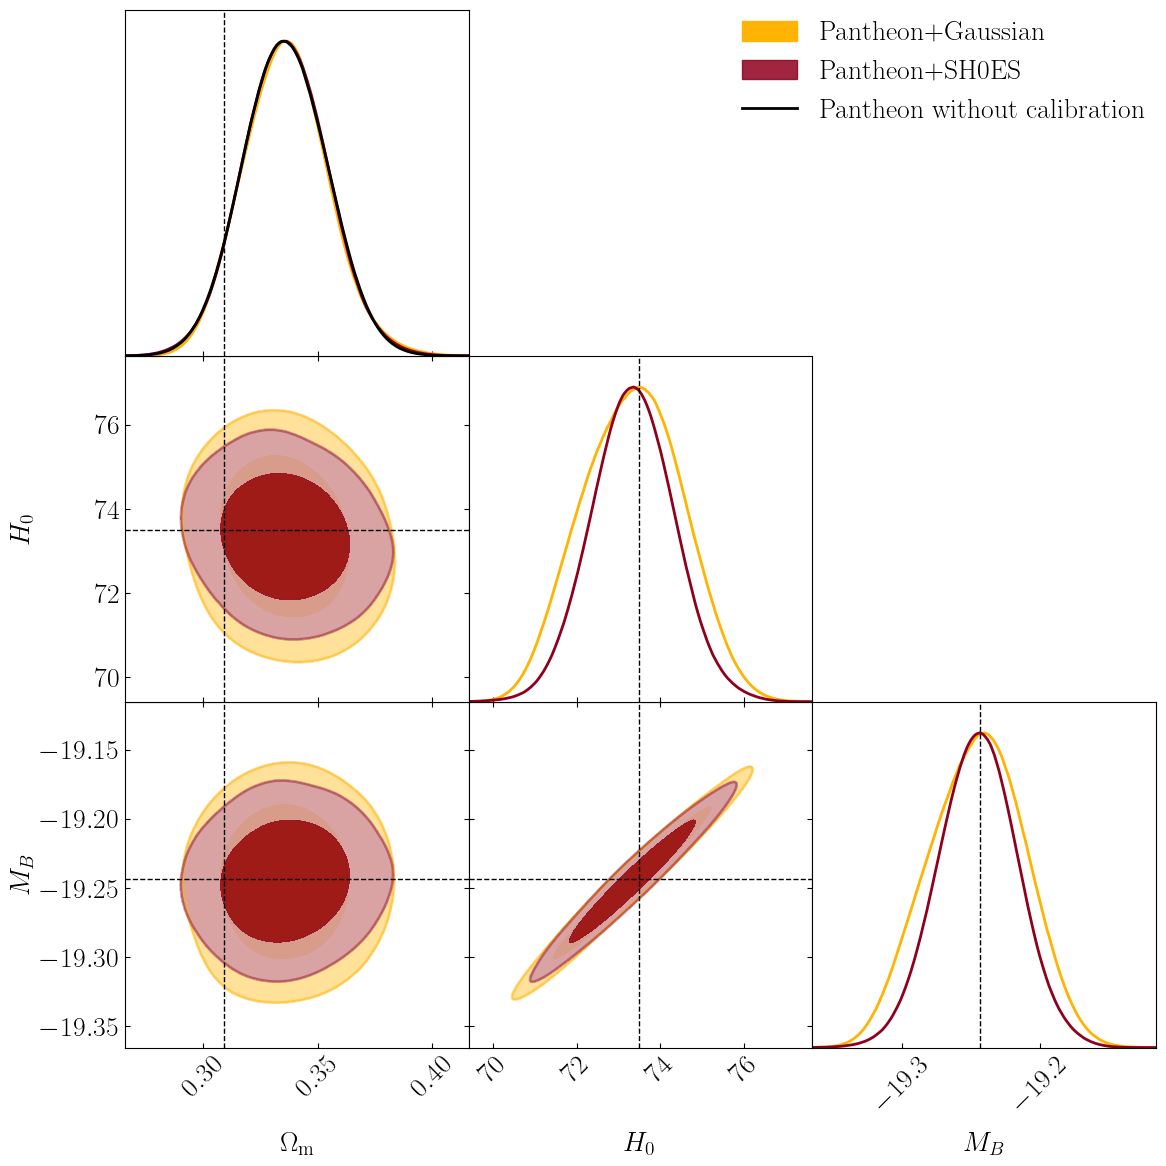

In [5]:
if len(analyzed_chains) > 0:
    g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
    g.settings.figure_legend_frame = False
    g.settings.axes_fontsize=20
    g.settings.axes_labelsize=20
    g.settings.legend_fontsize=20
    g.settings.axis_marker_color = 'black'
    g.settings.axis_marker_ls = '--'
    g.settings.axis_marker_lw = 1
    g.settings.axis_tick_x_rotation = 45
    g.triangle_plot([result['sample'] for result in analyzed_chains.values()], fiducial.keys(),
        filled=[result['filled'] for result in analyzed_chains.values()],
        legend_loc='upper right',
        legend_labels=[name for name in analyzed_chains.keys()],
        contour_colors=[result['color'] for result in analyzed_chains.values()],
        contour_lws=2,
        markers=fiducial)
    g.fig.align_ylabels()
    g.fig.align_xlabels();

## $\Lambda$CDM vs $w$CDM

In [6]:
fiducial = {'omegam': 0.309,
            'H0': 73.5,
            'w': -0.9,
            'MB': -19.2435}

stats = Analyzer(fiducial)

chains = {r'Pantheon $w$CDM': {'path': 'chains/standard/wCDM_Pantheon_SH0ES',
                               'sampler': 'Nautilus',
                               'color': red,
                               'filled': True},
          r'Pantheon $\Lambda$CDM': {'path': 'chains/standard/LCDM_Pantheon_SH0ES',
                               'sampler': 'Nautilus',
                               'color': yellow,
                               'filled': True},
         }

In [7]:
analyzed_chains = {}
for name,sets in chains.items():
    try:
        analyzed_chains[name] = stats.analyze_chain(name,sets)
    except:
        print('')
        print('{} not available'.format(name))
        print('')


 Analyzing Pantheon $w$CDM 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.284^{+0.080}_{-0.059}   $\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02219\pm 0.00056        $\\

{\boldmath$H_0            $} & $73.2\pm 1.0               $\\

{\boldmath$M_B            $} & $-19.245\pm 0.029          $\\

{\boldmath$w_0            $} & $-0.90^{+0.16}_{-0.13}     $\\

{\boldmath$\Omega_\mathrm{c} h^2$} & $0.130^{+0.043}_{-0.033}   $\\

{\boldmath$r_\mathrm{d}   $} & $146.3^{+5.9}_{-12}        $\\

{\boldmath$\Omega_\Lambda $} & $0.716^{+0.059}_{-0.080}   $\\
\hline
\end{tabular}
no .minimum file available for Pantheon $w$CDM. Switching to best sample
Best sample unavailable for some reason. Using means as best fit (DO NOT TRUST THIS!)
Best fit chi2 not available

 Analyzing Pantheon $\Lambda$CDM 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.336\pm 0.018            $\\

{\boldmath$\Omega_\mathrm{

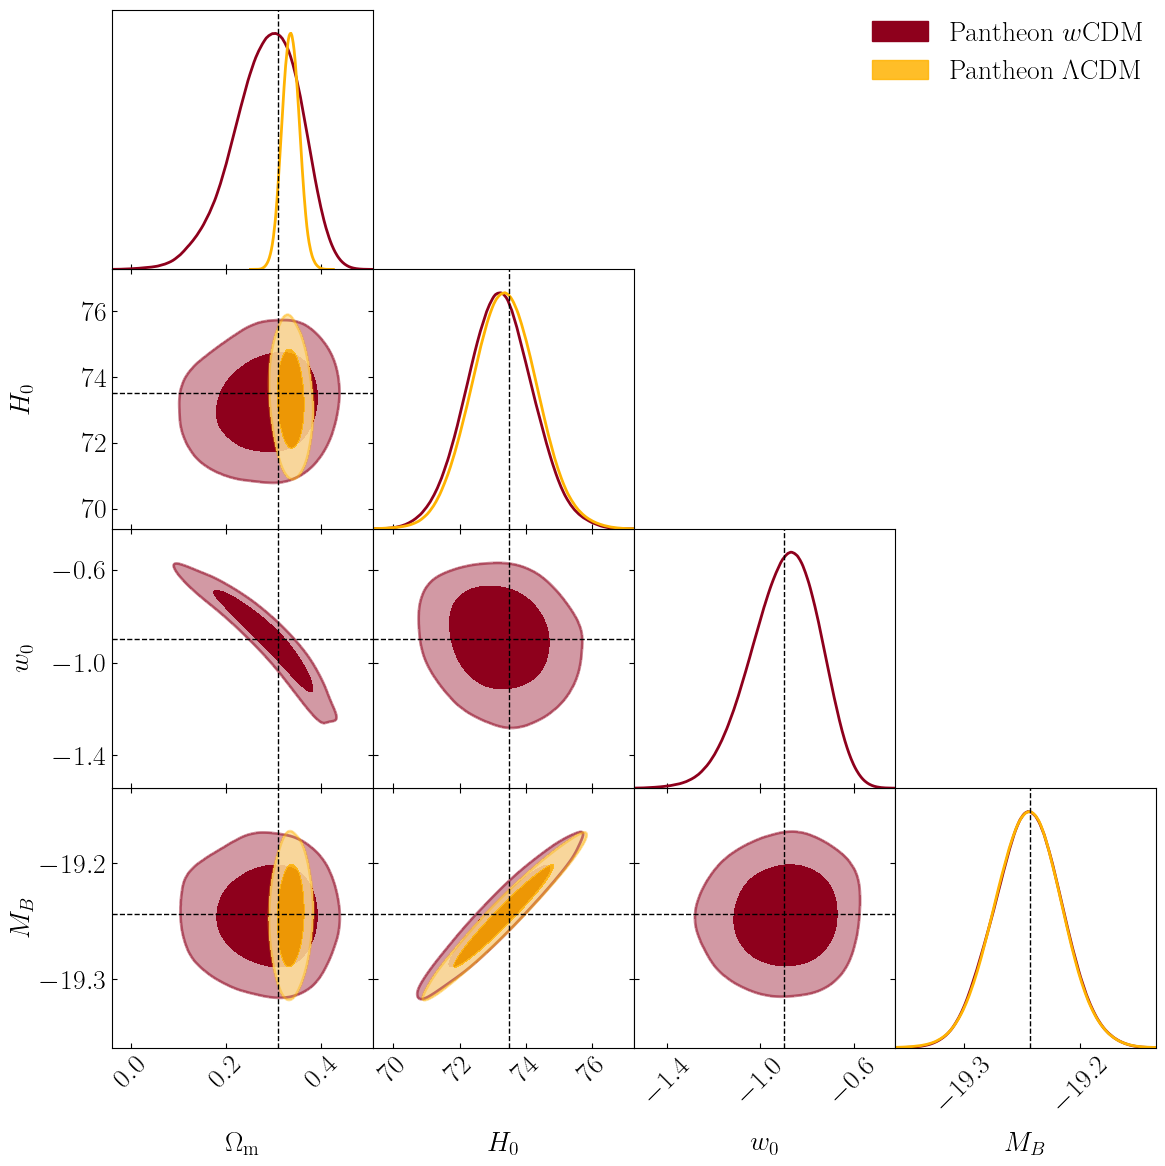

In [8]:
if len(analyzed_chains) > 0:
    g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
    g.settings.figure_legend_frame = False
    g.settings.axes_fontsize=20
    g.settings.axes_labelsize=20
    g.settings.legend_fontsize=20
    g.settings.axis_marker_color = 'black'
    g.settings.axis_marker_ls = '--'
    g.settings.axis_marker_lw = 1
    g.settings.axis_tick_x_rotation = 45
    g.triangle_plot([result['sample'] for result in analyzed_chains.values()], fiducial.keys(),
        filled=[result['filled'] for result in analyzed_chains.values()],
        legend_loc='upper right',
        legend_labels=[name for name in analyzed_chains.keys()],
        contour_colors=[result['color'] for result in analyzed_chains.values()],
        contour_lws=2,
        markers=fiducial)
    g.fig.align_ylabels()
    g.fig.align_xlabels();

# DESI plots

## DESI observables comparison

In [9]:
LCDM_bounds = {'omegam': {'mean': 0.2977,'sigma': 0.0086},
               'H0': {'mean': 68.51,'sigma': 0.58}}
fiducial = {par: val['mean'] for par,val in LCDM_bounds.items()}

stats = Analyzer(fiducial)

chains = {r'DESI $(\alpha_{\rm iso},\alpha_{\rm AP})$': {'path': 'chains/standard/LCDM_DESI',
                                                         'sampler': 'Nautilus',
                                                         'color': red,
                                                         'filled': True},
          r'DESI $(D_V/r_{\rm d},D_M/D_H)$': {'path': 'chains/standard/LCDM_DESI_distances',
                                              'sampler': 'Nautilus',
                                              'color': yellow,
                                              'filled': True},
         }

In [10]:
analyzed_chains = {}
for name,sets in chains.items():
    try:
        analyzed_chains[name] = stats.analyze_chain(name,sets)
    except:
        print('')
        print('{} not available'.format(name))
        print('')


 Analyzing DESI $(\alpha_{\rm iso},\alpha_{\rm AP})$ 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.2980^{+0.0077}_{-0.0088}$\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02217\pm 0.00055        $\\

{\boldmath$H_0            $} & $68.54\pm 0.58             $\\

{\boldmath$\Omega_\mathrm{c} h^2$} & $0.1172\pm 0.0047          $\\

{\boldmath$r_\mathrm{d}   $} & $148.3\pm 1.6              $\\

{\boldmath$\Omega_\Lambda $} & $0.7019^{+0.0088}_{-0.0077}$\\
\hline
\end{tabular}
no .minimum file available for DESI $(\alpha_{\rm iso},\alpha_{\rm AP})$. Switching to best sample
Best sample unavailable for some reason. Using means as best fit (DO NOT TRUST THIS!)
Best fit chi2 not available

 Analyzing DESI $(D_V/r_{\rm d},D_M/D_H)$ 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.2975^{+0.0080}_{-0.0094}$\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02220\pm 0.00054        $\\

{\boldmath$H_0        

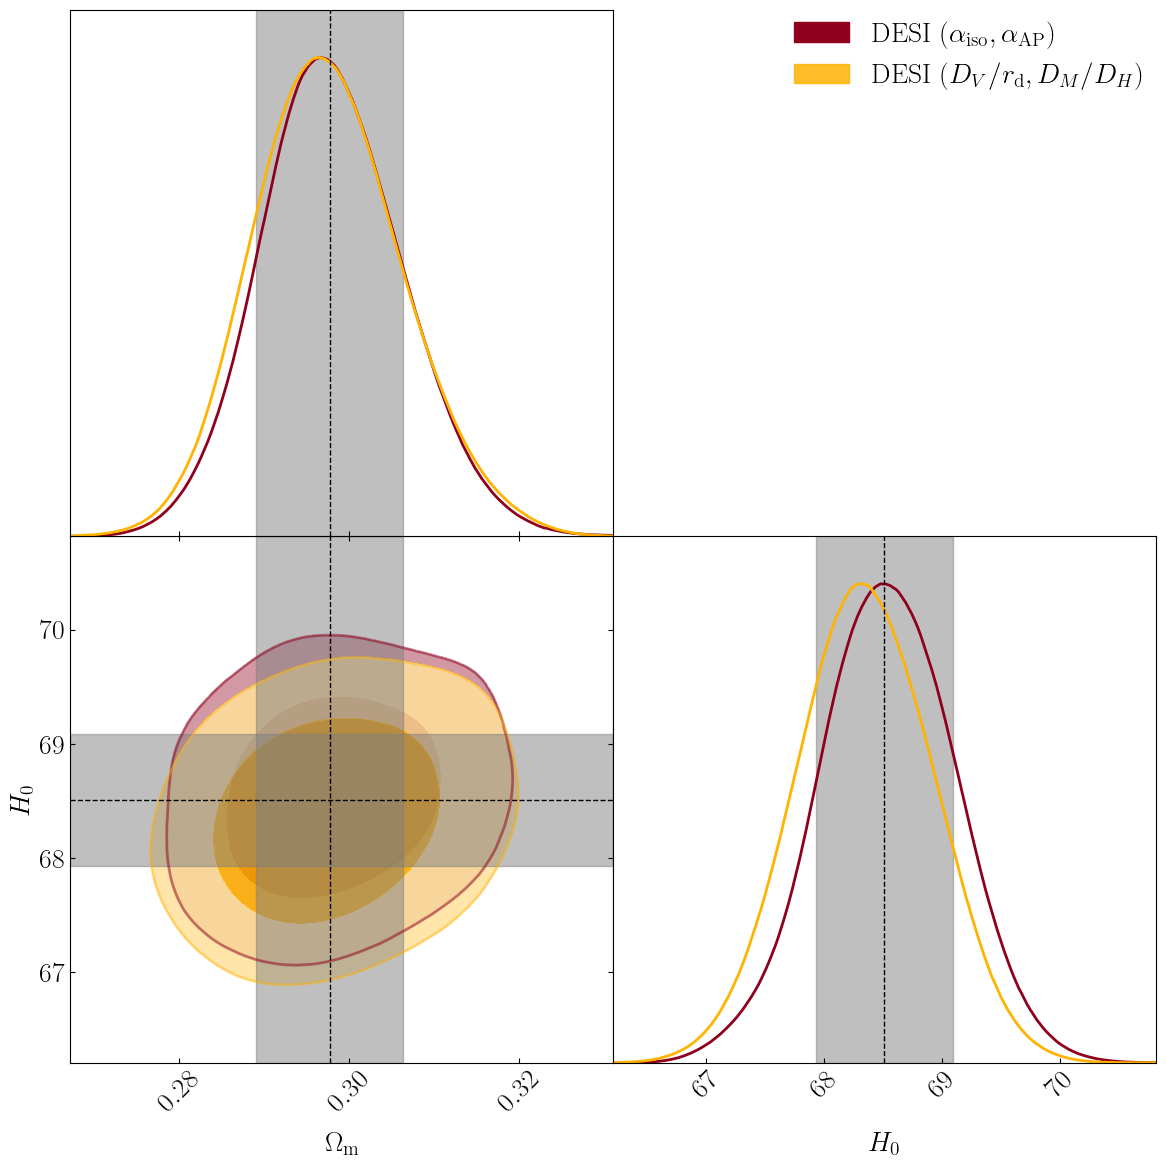

In [11]:
if len(analyzed_chains) > 0:
    g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
    g.settings.figure_legend_frame = False
    g.settings.axes_fontsize=20
    g.settings.axes_labelsize=20
    g.settings.legend_fontsize=20
    g.settings.axis_marker_color = 'black'
    g.settings.axis_marker_ls = '--'
    g.settings.axis_marker_lw = 1
    g.settings.axis_tick_x_rotation = 45
    g.triangle_plot([result['sample'] for result in analyzed_chains.values()], LCDM_bounds.keys(),
        filled=[result['filled'] for result in analyzed_chains.values()],
        legend_loc='upper right',
        legend_labels=[name for name in analyzed_chains.keys()],
        contour_colors=[result['color'] for result in analyzed_chains.values()],
        contour_lws=2,
        markers={k:v['mean'] for k,v in LCDM_bounds.items()})
    
    for i,par1 in enumerate(LCDM_bounds.values()):
        for j,par2 in enumerate(LCDM_bounds.values()):
            if j>=i:
                g.subplots[j,i].axvspan(par1['mean']-par1['sigma'],par1['mean']+par1['sigma'], alpha=0.5, color='gray')
                if j!=i:
                    g.subplots[j,i].axhspan(par2['mean']-par2['sigma'],par2['mean']+par2['sigma'], alpha=0.5, color='gray')
            
    g.fig.align_ylabels()
    g.fig.align_xlabels();

## DESI constraints without BBN prior

In [12]:
LCDM_bounds = {'omegam': {'mean': 0.2975,'sigma': 0.0086},
               'h_rdrag': {'mean': 101.54,'sigma': 0.73}}
fiducial = {par: val['mean'] for par,val in LCDM_bounds.items()}

stats = Analyzer(fiducial)

chains = {r'DESI $(\alpha_{\rm iso},\alpha_{\rm AP})$': {'path': 'chains/standard/LCDM_DESI_noBBN',
                                                         'sampler': 'Nautilus',
                                                         'color': red,
                                                         'filled': True},
         }

In [13]:
analyzed_chains = {}
for name,sets in chains.items():
    try:
        analyzed_chains[name] = stats.analyze_chain(name,sets)
    except:
        print('')
        print('{} not available'.format(name))
        print('')


 Analyzing DESI $(\alpha_{\rm iso},\alpha_{\rm AP})$ 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.2979^{+0.0076}_{-0.0085}$\\

{\boldmath$H_0            $} & $72\pm 10                  $\\

{\boldmath$r_\mathrm{d}   $} & $146^{+20}_{-40}           $\\

{\boldmath$\Omega_\mathrm{c} h^2$} & $0.140\pm 0.063            $\\

{\boldmath$h\,r_\mathrm{d}$} & $101.67\pm 0.70            $\\

{\boldmath$r_\mathrm{d}   $} & $146^{+20}_{-40}           $\\

{\boldmath$\Omega_\Lambda $} & $0.7020^{+0.0085}_{-0.0076}$\\
\hline
\end{tabular}
no .minimum file available for DESI $(\alpha_{\rm iso},\alpha_{\rm AP})$. Switching to best sample
Best sample unavailable for some reason. Using means as best fit (DO NOT TRUST THIS!)
Best fit chi2 not available


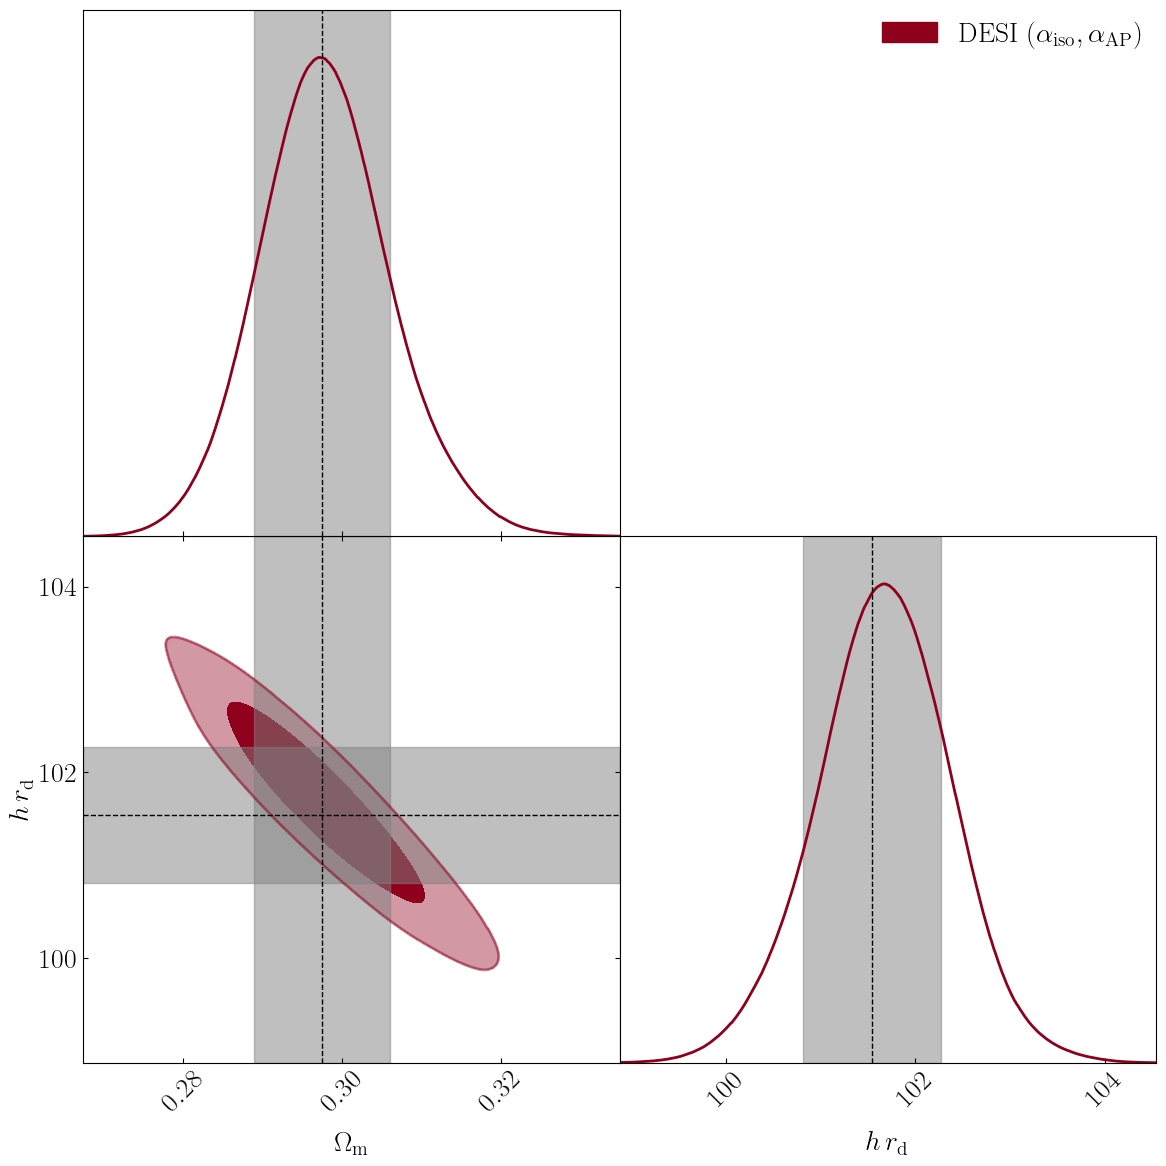

In [14]:
if len(analyzed_chains) > 0:
    g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
    g.settings.figure_legend_frame = False
    g.settings.axes_fontsize=20
    g.settings.axes_labelsize=20
    g.settings.legend_fontsize=20
    g.settings.axis_marker_color = 'black'
    g.settings.axis_marker_ls = '--'
    g.settings.axis_marker_lw = 1
    g.settings.axis_tick_x_rotation = 45
    g.triangle_plot([result['sample'] for result in analyzed_chains.values()], LCDM_bounds.keys(),
        filled=[result['filled'] for result in analyzed_chains.values()],
        legend_loc='upper right',
        legend_labels=[name for name in analyzed_chains.keys()],
        contour_colors=[result['color'] for result in analyzed_chains.values()],
        contour_lws=2,
        markers={k:v['mean'] for k,v in LCDM_bounds.items()})
    
    for i,par1 in enumerate(LCDM_bounds.values()):
        for j,par2 in enumerate(LCDM_bounds.values()):
            if j>=i:
                g.subplots[j,i].axvspan(par1['mean']-par1['sigma'],par1['mean']+par1['sigma'], alpha=0.5, color='gray')
                if j!=i:
                    g.subplots[j,i].axhspan(par2['mean']-par2['sigma'],par2['mean']+par2['sigma'], alpha=0.5, color='gray')
            
    g.fig.align_ylabels()
    g.fig.align_xlabels();

# Combined DESI and Pantheon results

In [15]:
fiducial = {'omegam': 0.2977,
            'H0': 68.51}

stats = Analyzer(fiducial)

chains = {r'DESI': {'path': 'chains/standard/LCDM_DESI',
                    'sampler': 'Nautilus',
                    'color': red,
                    'filled': True},
          r'Pantheon+SH0ES': {'path': 'chains/standard/LCDM_Pantheon_SH0ES',
                              'sampler': 'Nautilus',
                              'color': yellow,
                              'filled': True},
          r'DESI+Pantheon+SH0ES': {'path': 'chains/standard/LCDM_DESI_Pantheon_SH0ES',
                                   'sampler': 'Nautilus',
                                   'color': 'black',
                                   'filled': True},
         }

In [16]:
analyzed_chains = {}
for name,sets in chains.items():
    try:
        analyzed_chains[name] = stats.analyze_chain(name,sets)
    except:
        print('')
        print('{} not available'.format(name))
        print('')


 Analyzing DESI 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.2980^{+0.0077}_{-0.0088}$\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02217\pm 0.00055        $\\

{\boldmath$H_0            $} & $68.54\pm 0.58             $\\

{\boldmath$\Omega_\mathrm{c} h^2$} & $0.1172\pm 0.0047          $\\

{\boldmath$r_\mathrm{d}   $} & $148.3\pm 1.6              $\\

{\boldmath$\Omega_\Lambda $} & $0.7019^{+0.0088}_{-0.0077}$\\
\hline
\end{tabular}
no .minimum file available for DESI. Switching to best sample
Best sample unavailable for some reason. Using means as best fit (DO NOT TRUST THIS!)
Best fit chi2 not available

 Analyzing Pantheon+SH0ES 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.336\pm 0.018            $\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02217\pm 0.00054        $\\

{\boldmath$H_0            $} & $73.35\pm 0.99             $\\

{\boldmath$M_B            $} & $-19.245\pm 0.029 

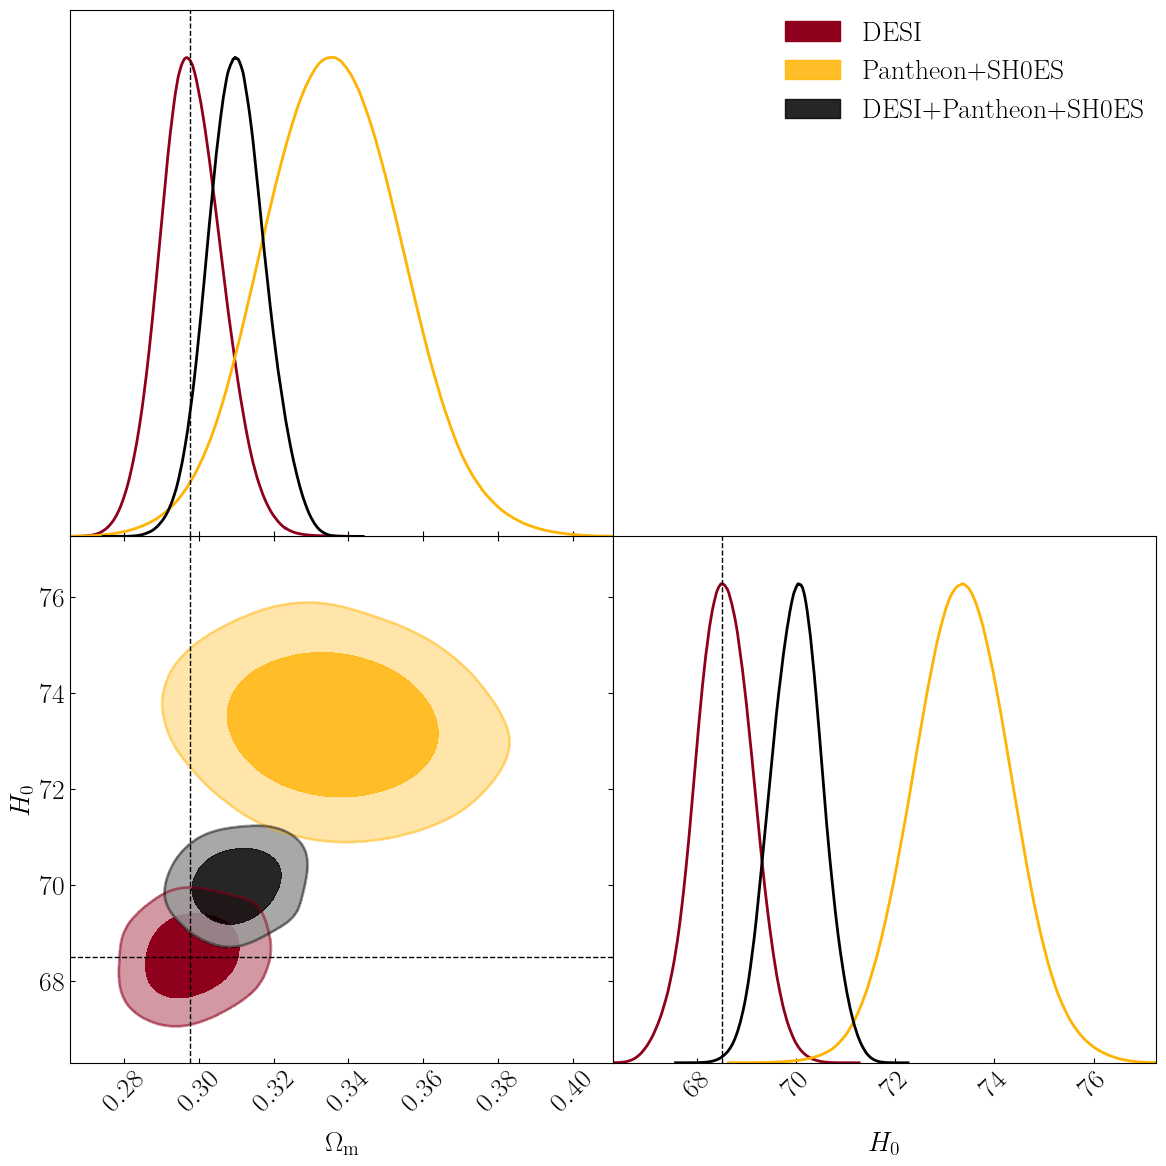

In [17]:
if len(analyzed_chains) > 0:
    g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
    g.settings.figure_legend_frame = False
    g.settings.axes_fontsize=20
    g.settings.axes_labelsize=20
    g.settings.legend_fontsize=20
    g.settings.axis_marker_color = 'black'
    g.settings.axis_marker_ls = '--'
    g.settings.axis_marker_lw = 1
    g.settings.axis_tick_x_rotation = 45
    g.triangle_plot([result['sample'] for result in analyzed_chains.values()], fiducial.keys(),
        filled=[result['filled'] for result in analyzed_chains.values()],
        legend_loc='upper right',
        legend_labels=[name for name in analyzed_chains.keys()],
        contour_colors=[result['color'] for result in analyzed_chains.values()],
        contour_lws=2,
        markers=fiducial)
    g.fig.align_ylabels()
    g.fig.align_xlabels();